In [1]:
# Installing kaggle

! pip install -q kaggle

In [2]:
# Creating a kaggle directory

!mkdir ~/.kaggle

In [5]:
# Copying json file to folder

!cp kaggle.json ~/.kaggle

In [14]:
# From kaggle dataset field copy API command
!kaggle datasets download -d saumyamohandas/50-startup

  0% 0.00/1.37k [00:00<?, ?B/s]
100% 1.37k/1.37k [00:00<00:00, 3.86MB/s]


In [15]:
# Unzip the downloaded (dataset) zip file

!unzip /content/50-startup.zip

Archive:  /content/50-startup.zip
  inflating: 50_Startups.csv         


In [21]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [22]:
# Loading the dataset
df=pd.read_csv("/content/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
# Finding the no.of features and observations
df.shape

(108, 5)

In [24]:
# Finding the datatype of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [25]:
# Finding unique observations in State feature

df.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

In [26]:
# Checking for null values if there are any

df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [27]:
# Importing and initialising Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
# Label Encoding state column

df.State = le.fit_transform(df.State)

In [29]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [30]:
# Finding correlation amongst the features

df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241379,0.725978,0.056264,0.964770
Administration,0.241379,1.000000,-0.024699,0.039406,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.055431,0.748957
State,0.056264,0.039406,0.055431,1.000000,0.061662
Profit,0.964770,0.198849,0.748957,0.061662,1.000000


In [31]:
# Finding descriptive statistics of the dataset

df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,1.027778,113523.760000
std,44996.368152,27322.385654,117937.942120,0.836753,38991.013654
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,0.000000,90708.190000
50%,75791.365000,122699.795000,239452.750000,1.000000,109543.120000
75%,101913.080000,145077.580000,298664.470000,2.000000,141585.520000
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


<Axes: >

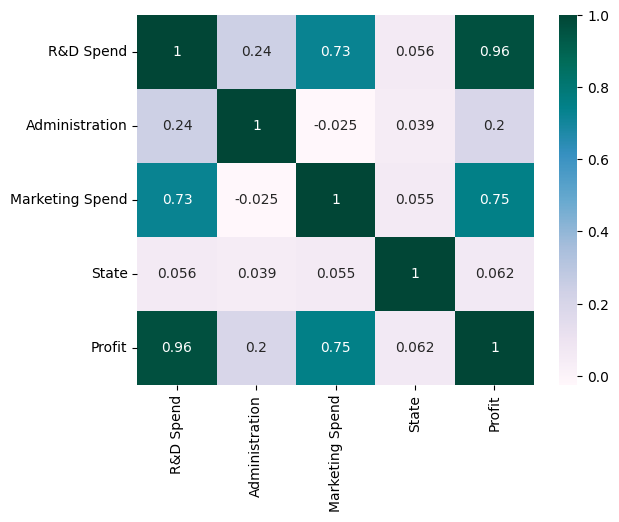

In [34]:
# Visualisaing the correlation heatmap of the dataset

sns.heatmap(df.corr(), annot=True, cmap = "PuBuGn")

In [33]:
# Splitting dataset (Storing independent features in X)

X = df.iloc[:,:-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [35]:
# Splitting dataset (Storing target feature in y)

y =df.Profit
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [36]:
# Importing MinMaxScaler for scaling independent features (X)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [37]:
# Scale X and store it in varibale X_scaled

X_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)
X_scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5


In [38]:
# Train test Split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [39]:
X_train.shape

(86, 4)

In [40]:
X_test.shape

(22, 4)

In [41]:
print(y.shape, Y_train.shape, Y_test.shape)

(108,) (86,) (22,)


In [42]:
# Model Building using Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression() #Initialisation
model.fit(X_train,Y_train)

LinearRegression()

In [43]:
# Checking Prediction on test data and storing it in y_pred variable

Y_pred=model.predict(X_test)
Y_pred

array([ 48379.24868386, 134848.9192467 ,  76483.10965225, 181561.78529188,
       112966.00035112, 134241.68257226, 129222.38731942, 160017.05919784,
       116752.96050775,  46260.9926407 , 102266.36060189, 115568.27177598,
        48379.24868386, 119114.16525526,  88602.22002789, 127101.40273623,
       127101.40273623,  90942.33421515,  58677.7334991 , 146304.26215166,
       149410.05441   , 152502.87810448])

In [44]:
# Importing the required metrics

from sklearn.metrics import r2_score

In [45]:
# Finding the accuracy of the model

acc = r2_score(Y_test,Y_pred)
acc

0.9258962347553817

In [46]:
# Testing the model with random variable and predicting

model.predict([[.873136,0.512998,0.812235,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([175133.4821405])

In [48]:
# Import the pickle library and dump the model as .pkl file
#This is done to save the model
import pickle
pickle.dump(model,open('startup.pkl','wb'))